In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Variant:
    def __init__(self, p):
        self.p = p
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def update(self, result_of_pull):
        pass

In [3]:
class UCB1(Variant):
    def __init__(self, p):
        super().__init__(p)
        self.estimated_p = 0

    def update(self, result_of_pull):
        sum = self.estimated_p * self.N + result_of_pull
        self.N += 1
        self.estimated_p = sum / self.N   

In [4]:
def ucb1_simulation(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75]):
    variants = [UCB1(p) for p in bandit_probabilities]

    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([variant.p for variant in variants])

    print("Optimal j:", optimal_j)

    #initilization of bandits
    for i in range(3):

        chosen_bandit = variants[i]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    for i in range (3, numb_of_trials):
        
        chosen_bandit_index = np.argmax([(variant.estimated_p + np.sqrt(2 * np.log(i) / variant.N)) for variant in variants])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = variants[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print(f"Optimal Run Percentage: {(num_optimal / numb_of_trials * 100):.2f}%")
    print("Bandits' P Estimates:", [variant.estimated_p for variant in variants])
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(numb_of_trials) + 1)
    plt.plot(win_rates, label="Algorithm Win Rate")
    plt.plot(np.ones(numb_of_trials)*np.max(bandit_probabilities), label="Best Performing Win Rate")
    plt.legend()
    plt.title("Win Rates over Trials")
    plt.xlabel("Trials")
    plt.ylabel("Win Rate")
    plt.show()

Optimal j: 2
Optimal Run Percentage: 97.02%
Bandits' P Estimates: [0.2816901408450705, 0.5044247787610616, 0.7490466865917758]
Reward Percentage:  0.7402


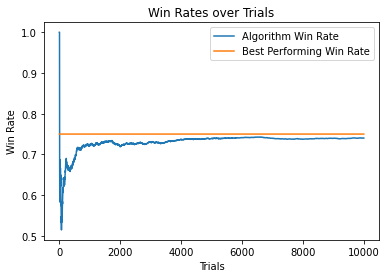

In [5]:
ucb1_simulation(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75])